<a href="https://colab.research.google.com/github/danielav081596/Proyecto_Integrador_Equipo5/blob/main/Avance2_Equipo%235.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Instituto Tecnológico y de Estudios Superiores de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

### TC5035.10 Proyecto Integrador - "Modelación y predicción del impacto de las experiencias benevolentes en la infancia en las Condiciones de Bienestar Emocional (BCEs) en niños y adultos mexicanos"


#### Dra. Grettel Barceló Alonso - Asesor del proyecto

*Avance 2. Ingeniería de características*


**Equipo # 5**
* Karla Daniela Valenzuela A00819192
* Emmanuel Domínguez Bravo A01793683

>En esta parte del proyecto, nos dedicaremos a la fase de preparación de los datos dentro de la metodología CRISP-ML, donde determinaremos las características estadísticamente más relevantes, determinaremos una estrategia de codificación para las variables categóricas y definiremos nuevas características que nos puedan arrojar mayor información sobre patrones no evidentes en la relación de los datos encaminados a la clasificación de las enfermedades que actualmente padecen los individuos encuestados con base en una serie de experiencias y condiciones físicas y socioeconómicas. Como en la entrega anterior, presentamos este avance para las dos bases de datos que se nos proporcionaron, cada una con datos de entrada y salida distintos.

In [ ]:
#!pip install pyreadstat

In [ ]:
# importamos las librerías requeridas

import numpy as np
import pandas as pd
#import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Instalamos Prince para la implementación del modelo MCA de reducción de
# dimensionalidad de variables categóricas

#!pip install prince

In [ ]:
#! git clone https://github.com/danielav081596/Proyecto_Integrador_Equipo5.git

In [ ]:
# Leemos los archivos con extensión .sav que se nos proporcionaron
#df_adultos, meta = pyreadstat.read_sav('/content/2.1.Base de ACES_Adultos.sav')
#df_menores, meta = pyreadstat.read_sav('/content/2.2.Base de ACES_Menores.sav')

# Escribimos los datos en un archivo .csv
#df_adultos.to_csv('ACEs Adultos.csv', index=False)

In [ ]:
# Creamos un dataframe del archivo .csv

df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


<ipython-input-8-2ec3293ece57>:3: DtypeWarning: Columns (87,525,538,539,540) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


In [ ]:
# La base de datos tiene 689 columnas:

df_adultos.head()

,FOLIO,FOLIO2,ID_ADULTO,TELEFONO,CORREO,BINOMIO,FILTRO,ENT,ENTIDAD,MUN,...,EDAD,INDIGENA,RELIGION,ESCOLARIDAD,NSEF,NSE5F,UPM,RURAL,PONDERADOR,AREA
0,0100108639999001-01,0100108639999001-01,1.0,4.493858e+09,yeimider1@gmail.com,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
1,0100108639999001-02,0100108639999001-02,3.0,4.495684e+09,NaN,0,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
2,0100108639999001-03,0100108639999001-03,1.0,4.494059e+09,Betomartiez89@gmail.com,1,2,1,AGUASCALIENTES,1,...,30.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
3,0100108639999001-04,0100108639999001-04,1.0,4.496682e+09,NaN,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,1.0,1.0,0100108639999,1.0,18619.783203,1.0
4,0100108639999001-05,0100108639999001-05,1.0,4.492521e+09,NaN,1,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,2.0,3.0,0100108639999,1.0,18619.783203,1.0


In [ ]:
#!pip install git+https://github.com/Cauchemare/Light_FAMD.git

In [ ]:
#pip install git+https://github.com/MaxHalford/Prince

In [ ]:
# Renombramos columnas para facilitar su identificación

survey = {'AD_M07_50':"Seguridad alimentaria 2",'AD_M07_51':"Seguridad alimentaria 3",'AD_M07_52':"Seguridad alimentaria 4",
                     'AD_M07_53':"Seguridad alimentaria 5",'AD_M07_54':"Seguridad alimentaria 6",'AD_M07_55':"Seguridad alimentaria 7",
                     'AD_M09_95_01_1':"comportamiento_riesgo 1",'AD_M09_95_01_2':"comportamiento_riesgo 2",'AD_M09_95_01_3':"comportamiento_riesgo 3",'AD_M09_95_01_4':"comportamiento_riesgo 4",
                     'AD_M09_95_02_1':"comportamiento_riesgo 5",'AD_M09_95_02_2':"comportamiento_riesgo 6",'AD_M09_95_02_3':"comportamiento_riesgo 7",'AD_M09_95_02_4':"comportamiento_riesgo 8",
                     'AD_M09_95_03_1':"comportamiento_riesgo 9",'AD_M09_95_03_2':"comportamiento_riesgo 10",'AD_M09_95_03_3':"comportamiento_riesgo 11",'AD_M09_95_03_4':"comportamiento_riesgo 12",
                     'AD_M09_95_04_1':"comportamiento_riesgo 13",'AD_M09_95_04_2':"comportamiento_riesgo 14",'AD_M09_95_04_3':"comportamiento_riesgo 15",'AD_M09_95_04_4':"comportamiento_riesgo 16",
                     'AD_M09_95_05_1':"comportamiento_riesgo 17",'AD_M09_95_05_2':"comportamiento_riesgo 18",'AD_M09_95_05_3':"comportamiento_riesgo 19",'AD_M09_95_05_4':"comportamiento_riesgo 20",
                     'AD_M09_95_06_1':"comportamiento_riesgo 21",'AD_M09_95_06_2':"comportamiento_riesgo 22",'AD_M09_95_06_3':"comportamiento_riesgo 23",'AD_M09_95_06_4':"comportamiento_riesgo 24",
                     'AD_M09_96_01_1':"Depresión",'AD_M09_96_02_1':"Trastorno Bipolar",'AD_M09_96_03_1':"Ezquizofrenia",'AD_M09_96_04_1':"Estrés postrauma",
                     'AD_M09_96_05_1':"Anorexia Nerviosa",'AD_M09_96_06_1':"Bulimia Nerviosa",'AD_M09_96_07_1':"Ansiedad_encuesta", 'AD_M09_96_08_1':'TRASTORNO_LÍMITE_PERSONALIDAD',
                     'AD_M09_96_09_1':"Ideación Suicida",'AD_M09_96_10_1':"AUTOLESIONES NO SUICIDAS",'AD_M09_96_11_1':"DÉFICIT_ATENCIÓN_HIPERACTIVIDAD",'AD_M09_96_12_1':"Alcoholismo",
                     'AD_M09_96_13_1':"Consumo_Sustancias",'AD_M09_96_14_1':"Autismo",'AD_M09_96_15_1':"Otro Trastorno",'AD_M09_97_01':"Síntomas_trastornos_1",'AD_M09_97_02':"Síntomas_trastornos_2",
                     'AD_M09_97_03':"Síntomas_trastornos_3",'AD_M09_97_04':"Síntomas_trastornos_4",'AD_M09_97_05':"Síntomas_trastornos_5",'AD_M09_97_02':"Síntomas_trastornos_2"}

df_adultos = df_adultos.rename(columns=survey)


In [ ]:
# List of columns to rename - Positive experiences
positive_att = {'AD_M10_115_01': 'Exp_pos_1','AD_M10_115_02': 'Exp_pos_2','AD_M10_115_03': 'Exp_pos_3','AD_M10_115_04': 'Exp_pos_4','AD_M10_115_05': 'Exp_pos_5',
                'AD_M10_115_06': 'Exp_pos_6','AD_M10_115_07': 'Exp_pos_7','AD_M10_115_08': 'Exp_pos_8','AD_M10_115_09': 'Exp_pos_9','AD_M10_115_10': 'Exp_pos_10',
                'AD_M10_116_01': 'Exp_pos_11','AD_M10_116_02': 'Exp_pos_12','AD_M10_116_03': 'Exp_pos_13','AD_M10_116_04': 'Exp_pos_14','AD_M10_116_05': 'Exp_pos_15',
                'AD_M10_116_06': 'Exp_pos_16','AD_M10_116_07': 'Exp_pos_17','AD_M11_117': 'Bienestar_1','AD_M11_118': 'Bienestar_2','AD_M12_120_01': 'Co_social_1',
                'AD_M12_120_02': 'Co_social_2','AD_M12_120_03': 'Co_social_3','AD_M12_120_04': 'Co_social_4','AD_M12_120_05': 'Co_social_5','AD_M12_120_06': 'Co_social_6',
                'AD_M12_120_07': 'Co_social_7','AD_M12_120_08': 'Co_social_8','AD_M12_120_09': 'Co_social_9','AD_M12_120_10': 'Co_social_10','AD_M12_120_11': 'Co_social_11',
                'AD_M12_120_12': 'Co_social_12','AD_M12_120_13': 'Co_social_13','AD_M12_120_14': 'Co_social_14','AD_M12_120_15': 'Co_social_15','AD_M12_120_16': 'Co_social_16'}

In [ ]:
# Renombramos las columnas
df_adultos = df_adultos.rename(columns=positive_att)

In [ ]:
# Renombramos las respuestas de experiencias negativas (ACEs)
ACES = {'Indicador01':'ACE1','Indicador02':'ACE2','Indicador03':'ACE3',
        'Indicador04':'ACE4','Indicador05':'ACE5','Indicador06':'ACE6',
        'Indicador07':'ACE7','Indicador08':'ACE8','Indicador09':'ACE9',
        'Indicador10':'ACE10','Indicador11':'ACE11','Indicador12':'ACE12',
        'Indicador13':'ACE13'}
df_adultos=df_adultos.rename(columns=ACES)

In [ ]:
#Agregamos las métricas de experiencias positivas aplicadas por los analistas a los encuestados

metrics = ['EX_BENEVOLENTES','FORTALEZAS','FELICIDAD','PROSOCIALIDAD','SUM_TOTAL']
df_adultos[metrics]=df_adultos[metrics]
df_adultos.rename(columns={'SUM_TOTAL':'SUM_EX_POS'},inplace=True)

In [ ]:
# Renombramos la columna 'NIV_SEG'
df_adultos.rename(columns={'NIV_SEG':'NIV_SEG_ALIMENTARIA'}, inplace=True)

In [ ]:
# Renombramos las variables dependientes

y_train_col = {'DxPHQ9':'Depresion', 'DxGAD7':'Ansiedad','DxPCL5':'TRANSTORNO_ESTRES POSTRAUMÁTICO','Dx_SCOFF':'SOSPECHA DE ANOREXIA/BULIMIA'}

df_adultos.rename(columns=y_train_col, inplace=True)

In [ ]:
# Identificamos las columnas de datos generales que no nos brindan información
# estadísticamente relevante

import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'NOTA[0-9]*',
    'FILTRO_[1-6]',
    'OTRO\$[0-9]',
    'ENT',
    'ENTIDAD',
    'MUN',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[0-9]*',
    'INT_ID\$[0-9]*',
    'FOLIO', 'FOLIO2', 'ID_ADULTO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS','INT_ID', 'OTRO','FOLIO','LATITUD',
    'LONGITUD','LOC','FVIS','MZN', 'AD_M07B']

for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
    df_adultos = df_adultos[df_adultos.columns[~df_adultos.columns.str.contains(variable_pattern, case=False)]]


In [ ]:
# Creamos una copia del data frame para no alterar el original

df_adultos2 = df_adultos.copy()

In [ ]:
# Revisamos los % de valores faltantes por columna
faltantes = (pd.isnull(df_adultos2).sum()/df_adultos2.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

AD_M09_104_04_04    100.000000
AD_M09_104_01_04    100.000000
AD_M09_96_15_4      100.000000
AD_M09_104_18_05    100.000000
FNAC$12             100.000000
                       ...    
FNAC$09              99.386921
AD_M09_96_01_4       99.386921
AD_M09_96_05_5       99.318801
AD_M09_96_05_3       99.318801
INDIGENA$09          99.318801
Length: 100, dtype: float64

In [ ]:
# Remove columns with more than 80% missing values
threshold = 85
columns_to_keep = faltantes[faltantes <= threshold].index
df_adultos2 = df_adultos2[columns_to_keep]

In [ ]:
# Revisamos nuevamente los % de valores faltantes por columna
faltantes = (pd.isnull(df_adultos2).sum()/df_adultos2.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

AD_M09_111_13_2     84.400545
AD_M13_122          83.855586
AD_M09_111_11_2     83.378747
AD_M09_114_01       78.474114
AD_M09_114_03       78.474114
                      ...    
AD_M09_101_04        0.817439
AD_M08_37            0.817439
AD_M08_35            0.749319
AD_M09_104_04_01     0.749319
AD_M08_38            0.749319
Length: 100, dtype: float64

In [ ]:
# Imputamos la moda para valores faltantes
for col in df_adultos2:
    mode_value = df_adultos2[col].mode()
    df_adultos2[col].fillna(mode_value, inplace=True)


In [ ]:
# Definimos nuestro conjunto de datos de salida etiquetados

y = df_adultos2[['Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']]

In [ ]:
# Revisamos los valores faltantes de y
faltantes = (pd.isnull(y).sum()/y.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

Depresion                          0.544959
Ansiedad                           0.544959
TRANSTORNO_ESTRES POSTRAUMÁTICO    0.544959
SOSPECHA DE ANOREXIA/BULIMIA       0.000000
dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer.
# Imputamos la moda a los valores faltantes con SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data to fill missing values
y_imputed = imputer.fit_transform(y)

# Convert back to a DataFrame
y_imputed_df = pd.DataFrame(y_imputed, columns=y.columns, index=y.index)

# Replace the original DataFrame with the imputed values
y = y_imputed_df

In [ ]:
# Definimos nuestros conjuntos de entrenamiento, prueba y validació
X_train, X_test, y_train, y_test = train_test_split(df_adultos2, y, test_size=0.3, random_state=0)

In [ ]:
# Definimos una función que sustituye los valores de cada columna con 1 cuando el valor boolean
# de la comparación de cada elemento con la moda de la columna es True y 0 cuando es False

def categorize_by_mode(column):
    mode_values = column.mode()
    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        return column.eq(mode_value).astype(int)
    else:
        return pd.Series(0, index=column.index)

Esta función nos permitió reducir significativamente la dimensionalidad de los datos, ya que anteriormente al hacer One Hot Encoding por medio del algoritmo del modelo MCA, obteníamos más de 1400 variables con un mínimo de información estadística, en el orden de 0.3 o 0.4% de varianza. Nuestra intención es enfocarnos en las respuestas que más se repitieron con la premisa que tendrán una mayor influencia en las variables de salida, para utilizarlas posteriormente en los diferentes modelos de clasificación.

In [ ]:
# Aplicamos la función definida anteriormente a todos los conjuntos

datasets = [X_train, X_test, y_train, y_test]

for idx, data in enumerate(datasets):
    for col in data.columns:
        datasets[idx][col] = categorize_by_mode(data[col])


In [ ]:
# Como tenemos un gran número de variables independientes, aplicamos MCA (Multiple Component Analysis)
# Para reducir la dimensionalidad y eficientar los recursos de cómputo

import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)
mca_result = mca.fit(X_train)

In [ ]:
# obtain main components
main_comp_X_train = mca_result.eigenvalues_summary
main_comp_X_train

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.034,5.95%,5.95%
1,0.028,4.79%,10.74%
2,0.021,3.71%,14.45%
3,0.019,3.23%,17.68%
4,0.015,2.60%,20.29%


In [ ]:
mca.plot(
    X_train,
    x_component=0,
    y_component=2,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [ ]:
# Identificamos las contribuciones de cada variable a la varianza de cada componente

contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [ ]:
# Exportamos el resultado a Excel para facilitar el manejo de los datos

contrib_df.to_csv('contributions_column_5comp_X_train.csv')

In [ ]:
# Para evitar la fuga de información, utilizamos el modelo MCA entrenado con los
# datos de entrenamiento y lo aplicamos al conjunto de prueba

mca_xtest = mca.transform(X_test)
contributions_xtest = mca.column_contributions_.style.format('{:.0%}')
contrib_xtest = pd.DataFrame(contributions_xtest.data)

In [ ]:
# Creamos una función para seleccionar las variables de X_train con 85% de variabilidad acumulada

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

X_train = X_train[selected_variables]

In [ ]:
# Vemos que ahora tenemos 93 columnas

X_train.shape

(1027, 93)

In [ ]:
# Visualizamos los tipos de caracteres. A pesar de ser tipo flotante o enteros,
# por la naturaleza de la información todos los datos seleccionados son
# de tipo categórico.

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 512 to 684
Data columns (total 93 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   GAD7_1                          1027 non-null   uint8
 1   INDIGENA$05_1                   1027 non-null   uint8
 2   DISCAPACIDAD$05_1               1027 non-null   uint8
 3   ESPANOL$05_1                    1027 non-null   uint8
 4   ESPANOL$04_1                    1027 non-null   uint8
 5   INDIGENA$04_1                   1027 non-null   uint8
 6   PHQ9_1                          1027 non-null   uint8
 7   AD_M09_96_01_7_1                1027 non-null   uint8
 8   LEER$04_1                       1027 non-null   uint8
 9   DISCAPACIDAD$04_1               1027 non-null   uint8
 10  AD_M09_96_01_6_1                1027 non-null   uint8
 11  SEXO$05_1                       1027 non-null   uint8
 12  AD_M09_96_01_5_1                1027 non-null   uint8
 13  AD

## Ingeniería de características

De acuerdo con Galli (2022), existen variables independientes que tienen un alto nivel de información mutua con la variable de salida, sin embargo tienen poca correlación entre sí, lo cual indica una relación no monotónica con la variable de salida. Para identificar si existe este comportamiento se combinan características con un modelo de árbol de desición, usualmente en dos o tres a la vez y se utiliza la predicción del modelo como una nueva característica.

In [ ]:
# Definimos los mparámetros del modelo para buscar la mejor combinación con GridSearch
param_grid = {"max_depth": [2, 3, 4, None]}

In [ ]:
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=0),
    cv=5,
    scoring='f1_weighted',
    param_grid=param_grid)

In [ ]:
variables_a_combinar1 = ['Depresión_1', 'Co_social_10_1']
variables_a_combinar2 = ['GAD7_1', 'Co_social_10_1']
variables_a_combinar3 = ['Ansiedad_1', 'Bienestar_1_1']

In [ ]:
# Iteramos sobre las variables a combinar y las usamos para entrenar el modelo
# y generar predicciones para crear nuevas características y las agregamos a
# los datasets X_train y X_train

var_dict = {'Dep+Co_social_10_1':variables_a_combinar1,
            'GAD7_1+Co_social_10_1':variables_a_combinar2,
            'Ansiedad_1+Bienestar_1_1':variables_a_combinar3}

for i,j in var_dict.items():
  tree_model.fit(X_train[j], y_train['Depresion_1'])
  X_train[i] = tree_model.predict(X_train[j])
  X_test[i] = tree_model.predict(X_test[j])

In [ ]:
# Visualizamos las nuevas columnas.

new_columns = ['Dep+Co_social_10_1','GAD7_1+Co_social_10_1','GAD7_1+Co_social_10_1']

X_train[new_columns].head()

,Dep+Co_social_10_1,GAD7_1+Co_social_10_1,GAD7_1+Co_social_10_1
512,1,0,0
320,0,0,0
608,0,0,0
195,0,1,1
721,1,0,0


En particular, las nuevas características las generamos pensando en el enfoque de nuestro proyecto hacia evaluar el impacto de experiencias positivas en las patologías sobre las cuales se realizó el levantamiento de los datos.


#Base de datos de niños

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Cargamos el archivo Excel
file_path = '/content/drive/MyDrive/2.2.Base de ACES_Menores.xlsx'
df = pd.read_excel(file_path)

# Verificamos las primeras filas del dataframe para entender su estructura
df.head()

,FOLIO,FOLIO2,VERSION,FILTRO,ENT,ENTIDAD,MUN,MUNICIPIO,LOC,LOCALIDAD,...,GPOEDAD,ESCOLARIDAD,HERMANOS,ACT_FAM,NLIBROS,NOVIOLENCIA,VIOLENCIA_FIS,VIOLENCIA_PSIC,VIOLENCIA,VIOLENCIA_SEVERA
0,0100108639999001-01,0100108639999001-01,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,1.0,2.0,1.0,2,0,0.0,0.0,0.0,1.0,0.0
1,0100108639999001-03,0100108639999001-03,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,NaN,1.0,1.0,1,0,0.0,0.0,1.0,1.0,0.0
2,0100108639999001-04,0100108639999001-04,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,NaN,1.0,1.0,2,0,1.0,0.0,0.0,0.0,0.0
3,0100108639999001-05,0100108639999001-05,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,2.0,1.0,1.0,2,0,0.0,0.0,0.0,1.0,0.0
4,0100108639999002-02,0100108639999002-02,VER02,2,1,AGUASCALIENTES,1,AGUASCALIENTES,863,COTORINA (COYOTES),...,2.0,1.0,1.0,1,0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Columns to be removed
columns_to_remove = [
    "NN_M06_09", "NN_M06_10_1", "NN_M06_10_2", "NN_M06_10_3", "NN_M06_10_4",
    "NN_M06_10_5", "NN_M06_10_6", "NN_M06_10_7", "NN_M06_10_8", "NN_M05_18",
    "NN_M05_19", "NN_M06_02", "NN_M06_03", "NN_M06_04", "NN_M06_07",
    "NN_M06_10_9", "NN_M06_10_10", "NN_M06_10_11", "NN_M06_10_12",
    "NN_M06_10_13", "NN_M06_10_14", "NN_M06_10_15", "NN_M06_10_16",
    "NN_M07_05", "NN_M07_06", "NN_M07_18B", "NN_M07_19A2", "NN_M07_19B2",
    "NN_M07_19C2", "NN_M07_19D2", "NN_M07_19E2", "NN_M07_19F2", "NN_M07_19G2",
    "NN_M07_22", "NN_MO7_25V", "NN_M07_26", "NN_M14_02", "NN_M14_04",
    "NN_M14_06", "NN_M14_08", "NN_M03_02", "NN_M03_03", "NN_M03_04",
    "NN_M03_05", "NN_M03_06", "FOLIO2","FOLIO","MESES_CALC","DIAS_CALC", "VERSION", "FILTRO", "ENT", "ENTIDAD",
    "MUN", "MUNICIPIO", "LOC", "LOCALIDAD", "AGEB", "MZN", "ENC", "MAQUINA",
    "GPS1", "LATITUD", "LONGITUD","PEARLS_Pte1","NM_M04_01","NN_M04_04","NN_M04_06","NN_M04_07", "GPOEDAD","NN_M04_05","NN_M05_02", "NM_M04_03",
    "NN_M05_10", "NN_M07_01", "NN_M07_02", "NN_M07_03", "NN_M07_17", "NN_M07_18",
    "NN_M12_01", "NN_M12_261", "NN_M13_09", "EDADM", "HERMANOS","PONDERADOR"
]

# Remove the specified columns
df_cleaned = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')

df_cleaned.head()

,EDAD_CALC,NN_M04_08,NN_M04_09,NN_M04_10,NN_M04_11,NN_M04_12,NN_M04_13,NOTA5,NN_M05_01,NN_M05_03,...,RURAL,AREA,ESCOLARIDAD,ACT_FAM,NLIBROS,NOVIOLENCIA,VIOLENCIA_FIS,VIOLENCIA_PSIC,VIOLENCIA,VIOLENCIA_SEVERA
0,3,NaN,4,NaN,1,2.0,2,1,23,1,...,1,1,2.0,2,0,0.0,0.0,0.0,1.0,0.0
1,5,NaN,3,NaN,1,1.0,2,1,25,1,...,1,1,1.0,1,0,0.0,0.0,1.0,1.0,0.0
2,5,NaN,3,NaN,1,1.0,2,1,21,1,...,1,1,1.0,2,0,1.0,0.0,0.0,0.0,0.0
3,4,NaN,2,NaN,1,3.0,3,1,28,1,...,1,1,1.0,2,0,0.0,0.0,0.0,1.0,0.0
4,4,NaN,2,NaN,1,1.0,1,1,14,1,...,1,1,1.0,1,0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Buscamos y eliminamos columnas que coincidan con el patrón "NOTA(numero)"
import re

# Patrón para identificar las columnas con el formato "NOTA(numero)"
pattern = re.compile(r'NOTA\d+')

# Filtramos las columnas que coinciden con el patrón
columns_to_remove = [col for col in df_cleaned.columns if pattern.match(col)]

# Eliminamos las columnas identificadas del dataframe
df_cleaned_filtered = df_cleaned.drop(columns=columns_to_remove, errors='ignore')

# Mostramos las columnas eliminadas y la nueva dimensión del dataframe
columns_to_remove, df_cleaned_filtered.shape

(['NOTA5',
  'NOTA6',
  'NOTA7',
  'NOTA8',
  'NOTA9',
  'NOTA10',
  'NOTA11A',
  'NOTA11B',
  'NOTA11C',
  'NOTA11D',
  'NOTA12',
  'NOTA121',
  'NOTA13',
  'NOTA14'],
 (249, 299))

In [ ]:
# Removemos filas duplicadas
df_no_duplicates = df_cleaned_filtered.drop_duplicates()

# Calculamos el porcentaje de datos faltantes por columna
missing_data_percent = df_no_duplicates.isnull().mean() * 100

# Filtramos las columnas para remover aquellas con más del 50% de datos faltantes
columns_to_keep = missing_data_percent[missing_data_percent <= 50].index

# Mantenemos solo las columnas seleccionadas
df_filtered_final = df_no_duplicates[columns_to_keep]

# Resultados
df_no_duplicates_shape = df_no_duplicates.shape
df_filtered_final_shape = df_filtered_final.shape
df_no_duplicates_shape, df_filtered_final_shape

((249, 299), (249, 219))

In [ ]:
# Definimos una función que sustituye los valores de cada columna con 1 cuando el valor boolean
# de la comparación de cada elemento con la moda de la columna es True y 0 cuando es False

def categorize_by_mode(column, all_modes=False, default_value=0):
    mode_values = column.mode()
    if not mode_values.empty:
        if all_modes:
            return column.isin(mode_values).astype(int)
        else:
            mode_value = mode_values.iloc[0]
            return column.eq(mode_value).astype(int)
    else:
        return pd.Series(default_value, index=column.index)

In [ ]:
# Definimos una función para utilizar una frecuencia mínima de ocurrencia
# para reducir el número de categorías para las variables con alta cardinalidad

from collections import Counter

def cumulatively_categorise(column):

  #Replace all instances not in our new categories by 0
  new_column=column.eq(column.mode()).astype(int)

  #Return transformed column and unique values if return_categories=True
  return new_column

In [ ]:
for col in df_filtered_final.columns:
    mode_value = df_filtered_final[col].mode()[0]  # Tomamos la primera moda si hay múltiples
    df_filtered_final[col].fillna(mode_value, inplace=True)

<ipython-input-464-fc54dea672a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col].fillna(mode_value, inplace=True)
<ipython-input-464-fc54dea672a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col].fillna(mode_value, inplace=True)
<ipython-input-464-fc54dea672a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col].fillna(mode_value, inplace=True)
<ipython-input-464-fc54de

In [ ]:
df_filtered_final.head(10)

,EDAD_CALC,NN_M04_09,NN_M04_11,NN_M04_12,NN_M04_13,NN_M05_01,NN_M05_03,NN_M05_04,NN_M05_06,NN_M05_08,...,RURAL,AREA,ESCOLARIDAD,ACT_FAM,NLIBROS,NOVIOLENCIA,VIOLENCIA_FIS,VIOLENCIA_PSIC,VIOLENCIA,VIOLENCIA_SEVERA
0,3,4,1,2.0,2,23,1,1,2,2,...,1,1,2.0,2,0,0.0,0.0,0.0,1.0,0.0
1,5,3,1,1.0,2,25,1,2,1,2,...,1,1,1.0,1,0,0.0,0.0,1.0,1.0,0.0
2,5,3,1,1.0,2,21,1,2,1,2,...,1,1,1.0,2,0,1.0,0.0,0.0,0.0,0.0
3,4,2,1,3.0,3,28,1,2,1,2,...,1,1,1.0,2,0,0.0,0.0,0.0,1.0,0.0
4,4,2,1,1.0,1,14,1,2,1,2,...,1,1,1.0,1,0,0.0,1.0,0.0,1.0,0.0
5,3,4,2,1.0,1,26,1,2,1,2,...,1,1,2.0,2,0,1.0,0.0,0.0,0.0,0.0
6,5,3,1,1.0,1,17,1,2,1,2,...,1,1,1.0,1,0,0.0,0.0,1.0,1.0,0.0
7,5,3,1,6.0,4,31,1,2,1,2,...,1,1,1.0,2,0,0.0,0.0,1.0,1.0,0.0
8,3,4,1,2.0,2,29,1,2,1,2,...,1,1,2.0,2,0,0.0,0.0,0.0,0.0,0.0
9,4,2,1,2.0,1,18,1,2,1,2,...,1,1,1.0,2,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Cargamos el diccionario de la encuesta para identificar las columnas de clasificación
diccionario_path = '/content/Diccionario Encuestas Niños.xlsx'
diccionario_df = pd.read_excel(diccionario_path)

# Verificamos las primeras filas del diccionario para entender su estructura
diccionario_df.head()

,ID Columna,Categoria,Descripcion,Valores
0,NM_M04_03,Individuo,FECHA DE NACIMIENTO DE,NaN
1,NM_M04_04,Individuo,¿FUE VERIFICADA LA FECHA DE NACIMIENTO?,NaN
2,EDAD_CALC,Individuo,EDAD_CALC,NaN
3,MESES_CALC,Individuo,MESES_CALC,NaN
4,DIAS_CALC,Individuo,DIAS_CALC,NaN


In [ ]:
# Filtramos las columnas que tienen valores definidos, indicando posiblemente una clasificación
columnas_con_valores_definidos = diccionario_df[diccionario_df['Valores'].notnull()]['ID Columna']

# Convertimos la serie en lista para facilitar la visualización
columnas_con_valores_definidos_list = columnas_con_valores_definidos.tolist()

columnas_con_valores_definidos_list

['NN_M04_11',
 'NOTA5',
 'NN_M05_03',
 'NN_M05_04',
 'NN_M05_06',
 'NN_M05_08',
 'NN_M05_09',
 'NN_M05_10',
 'NN_M05_11',
 'NN_M05_12',
 'NN_M05_13',
 'NN_M05_14',
 'NN_M05_15',
 'NN_M05_17',
 'NN_M06_01',
 'NN_M06_05',
 'NN_M06_07',
 'NN_M06_09',
 'NN_M06_10_1',
 'NN_M06_10_2',
 'NN_M06_10_3',
 'NN_M06_10_4',
 'NN_M06_10_5',
 'NN_M06_10_6',
 'NN_M06_10_7',
 'NN_M06_10_8',
 'NN_M05_17',
 'NN_M06_01',
 'NN_M06_05',
 'NN_M06_07',
 'NN_M06_10_9',
 'NN_M06_10_10',
 'NN_M06_10_11',
 'NN_M06_10_12',
 'NN_M06_10_13',
 'NN_M06_10_14',
 'NN_M06_10_15',
 'NN_M06_10_16',
 'NN_M07_01',
 'NN_M07_02',
 'NN_M07_03',
 'NN_M07_04',
 'NN_M07_07',
 'NN_M07_08',
 'NN_M07_11',
 'NN_M07_12',
 'NN_M07_13',
 'NN_M07_14',
 'NN_M07_15',
 'NN_M07_16',
 'NN_M07_17',
 'NN_M07_18',
 'NN_M07_18B',
 'NN_M07_19A1',
 'NN_M07_19A2',
 'NN_M07_19B1',
 'NN_M07_19B2',
 'NN_M07_19C1',
 'NN_M07_19C2',
 'NN_M07_19D1',
 'NN_M07_19D2',
 'NN_M07_19E1',
 'NN_M07_19E2',
 'NN_M07_19F1',
 'NN_M07_19F2',
 'NN_M07_19G1',
 'NN_M07_19G2'

In [ ]:
# Convertimos las columnas identificadas como categóricas en el dataframe a tipo 'category'
for col in columnas_con_valores_definidos_list:
    if col in df_filtered_final.columns:
        df_filtered_final[col] = df_filtered_final[col].astype('category')

# Verificamos los nuevos tipos de datos para confirmar la conversión
df_filtered_final.dtypes

<ipython-input-468-ec22d330c6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-468-ec22d330c6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-468-ec22d330c6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

EDAD_CALC              int64
NN_M04_09              int64
NN_M04_11           category
NN_M04_12            float64
NN_M04_13              int64
                      ...   
NOVIOLENCIA         category
VIOLENCIA_FIS        float64
VIOLENCIA_PSIC       float64
VIOLENCIA            float64
VIOLENCIA_SEVERA     float64
Length: 219, dtype: object

In [ ]:
columnas_numericas = df_filtered_final.select_dtypes(include=['number']).columns.tolist()

columnas_numericas

['EDAD_CALC',
 'NN_M04_09',
 'NN_M04_12',
 'NN_M04_13',
 'NN_M05_01',
 'NN_M06_06',
 'NN_M07_09',
 'NN_M07_10',
 'NN_M10_01A',
 'NN_M10_03',
 'PEARLS1',
 'Escala1',
 'Escala2',
 'Escala3',
 'Escala4',
 'Escala5',
 'Escala_Inter',
 'Escala_Exter',
 'Escala_Total',
 'SDQ3',
 'DxSDQ3',
 'SDQ4',
 'DxSDQ4',
 'PEARLS_Pte2',
 'ABUSO_SEXUAL',
 'NSEF',
 'NSE5F',
 'RURAL',
 'NLIBROS',
 'VIOLENCIA_FIS',
 'VIOLENCIA_PSIC',
 'VIOLENCIA',
 'VIOLENCIA_SEVERA']

In [ ]:
columnas_a_convertir = [
    "PEARLS1", "Escala1", "Escala2", "Escala3", "Escala4", "Escala5",
    "Escala_Inter", "Escala_Exter", "Escala_Total", "SDQ3", "DxSDQ3", "SDQ4",
    "DxSDQ4", "PEARLS_Pte2", "ABUSO_SEXUAL", "NSEF", "NSE5F", "RURAL",
    "VIOLENCIA_FIS", "VIOLENCIA_PSIC", "VIOLENCIA", "VIOLENCIA_SEVERA"
]

# Convertimos las columnas especificadas a tipo 'category'
for col in columnas_a_convertir:
    if col in df_filtered_final.columns:
        df_filtered_final[col] = df_filtered_final[col].astype('category')

# Verificamos los tipos de las columnas convertidas para confirmar la conversión
df_filtered_final[columnas_a_convertir].dtypes

<ipython-input-470-930257372d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-470-930257372d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_final[col] = df_filtered_final[col].astype('category')
<ipython-input-470-930257372d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

PEARLS1             category
Escala1             category
Escala2             category
Escala3             category
Escala4             category
Escala5             category
Escala_Inter        category
Escala_Exter        category
Escala_Total        category
SDQ3                category
DxSDQ3              category
SDQ4                category
DxSDQ4              category
PEARLS_Pte2         category
ABUSO_SEXUAL        category
NSEF                category
NSE5F               category
RURAL               category
VIOLENCIA_FIS       category
VIOLENCIA_PSIC      category
VIOLENCIA           category
VIOLENCIA_SEVERA    category
dtype: object

In [ ]:
# Primero, creamos un diccionario de mapeo de ID de columna a Descripción omitiendo la columna PEARLS1
mapeo_titulos = diccionario_df.set_index('ID Columna')['Descripcion'].to_dict()

# Modificamos el nombre de 'PEARLS1' a 'PEARLS' en el diccionario de mapeo si está presente
if 'PEARLS1' in mapeo_titulos:
    mapeo_titulos['PEARLS'] = mapeo_titulos.pop('PEARLS1')

# Renombramos las columnas del dataframe usando el diccionario de mapeo
# Solo se renombrarán las columnas presentes tanto en el dataframe como en el diccionario de mapeo
columnas_renombradas_df = df_filtered_final.rename(columns=lambda x: mapeo_titulos[x] if x in mapeo_titulos else x)

# Mostramos algunas de las nuevas columnas para confirmar el cambio
columnas_renombradas_df.columns.tolist()[:10]  # Mostramos solo las primeras 10 para verificar

['EDAD_CALC',
 'NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO',
 '¿TIENE HERMANOS?',
 '¿CUÁNTOS HERMANOS TIENE NOMBRE?',
 'DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?',
 'EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE',
 'LA MADRE LLEVÓ CONTROL PRENATAL',
 'HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO',
 'DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL  TABACO O ALGUNA SUSTANCIA',
 'DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA  PSICOLÓGICA  ECONÓMICA O SEXUAL?']

In [ ]:
estadisticas_descriptivas = columnas_renombradas_df.select_dtypes(include=['number']).describe()

estadisticas_descriptivas

,EDAD_CALC,NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO,¿CUÁNTOS HERMANOS TIENE NOMBRE?,DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?,EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE,¿CUÁNTAS COMIDAS NOMBRE HACE AL DÍA?,¿CUANTAS VECES AL AÑO SE ENFERMA NOMBRE DE LAS VÍAS RESPIRATORIAS?,¿CUANTAS VECES AL AÑO A NOMBRE LE DA DIARREA?,NN_M10_01A,74. ¿CUÁNTOS DÍAS A LA SEMANA DEJÓ A SU HIJO/A AL CUIDADO DE OTRO NIÑO/A ES DECIR CON ALGUIEN MENOR DE 10 AÑOS,8.2. NÚMERO DE LIBROS
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,3.991968,2.686747,1.658635,2.068273,25.791165,3.240964,4.489960,2.714859,1.550201,0.236948,2.248996
std,0.941824,1.084283,1.047239,1.121346,8.062543,0.860284,9.119773,7.640289,1.983422,0.863741,4.183571
min,0.000000,1.000000,0.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,21.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1.000000,2.000000,25.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,5.000000,3.000000,2.000000,3.000000,30.000000,4.000000,4.000000,2.000000,3.000000,0.000000,0.000000
max,7.000000,5.000000,6.000000,8.000000,99.000000,7.000000,99.000000,99.000000,8.000000,7.000000,10.000000


In [ ]:
# Definir las funciones de agrupación para cada variable

# Edad en años cumplidos
def agrupar_edad(edad):
    if edad <= 4:
        return '0-4'
    elif edad <= 9:
        return '5-9'
    else:
        return '10-14'

# Número de hermanos
def agrupar_hermanos(num_hermanos):
    if pd.isna(num_hermanos):
        return 'Desconocido'
    elif num_hermanos == 0:
        return '0'
    elif num_hermanos <= 2:
        return '1-2'
    elif num_hermanos <= 4:
        return '3-4'
    else:
        return '5+'

# Edad de la madre al embarazarse
def agrupar_edad_madre(edad):
    if edad < 20:
        return '<20'
    elif edad <= 29:
        return '20-29'
    elif edad <= 39:
        return '30-39'
    else:
        return '40+'

# Convertir a numérico, errores a NaN
columnas_renombradas_df['EDAD_CALC'] = pd.to_numeric(columnas_renombradas_df['EDAD_CALC'], errors='coerce')
columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'] = pd.to_numeric(columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'], errors='coerce')
columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'] = pd.to_numeric(columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'], errors='coerce')

# aplicar las funciones de agrupación después de la conversión
columnas_renombradas_df['EDAD_CALC'] = columnas_renombradas_df['EDAD_CALC'].apply(agrupar_edad)
columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'] = columnas_renombradas_df['¿CUÁNTOS HERMANOS TIENE NOMBRE?'].apply(agrupar_hermanos)
columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'] = columnas_renombradas_df['EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE'].apply(agrupar_edad_madre)



In [ ]:
columnas_categoricas = [col for col in columnas_renombradas_df.columns if pd.api.types.is_categorical_dtype(columnas_renombradas_df[col])]
columnas_categoricas

['¿TIENE HERMANOS?',
 'LA MADRE LLEVÓ CONTROL PRENATAL',
 'HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO',
 'DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL  TABACO O ALGUNA SUSTANCIA',
 'DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA  PSICOLÓGICA  ECONÓMICA O SEXUAL?',
 'DURANTE O POSTERIOR AL EMBARAZO DE NOMBRE SU MADRE CURSÓ CON DEPRESIÓN?',
 '¿CUAL FUE EL PESO AL NACER?',
 'SE UTILIZARON FÓRCEPS DURANTE EL NACIMIENTO',
 'HUBO ALGUNA COMPLICACIÓN DURANTE EL NACIMIENTO',
 'RESPIRÓ Y LLORÓ AL NACER',
 'REQUIRIÓ ESTANCIA EN LA INCUBADORA',
 'LE DIO PECHO ALGUNA VEZ A NOMBRE?',
 'ACTUALMENTE ESTÁ INTEGRADO A LA DIETA FAMILIAR? (CONSUME TODOS O CASI TODOS LOS ALIMENTOS QUE CONSUME EL RESTO DE LOS INTEGRANTES DE LA FAMILIA)',
 '¿CONTROLA EL IR AL BAÑO A HACER PIPÍ Y POPÓ SOLO?',
 '¿CUÁL DE LAS SIGUIENTES FRASES SE PARECE A LA FORMA DE DESPERTAR?',
 'EN LAS NOCHES NOMBRE ¿TIENE UN HORARIO REGULAR PARA DORMIR?',
 '¿ALGUNA VEZ SE ENFERMÓ DE

In [ ]:
columnas_categoricas = [col for col in columnas_renombradas_df.columns if pd.api.types.is_categorical_dtype(columnas_renombradas_df[col])]
for col in columnas_categoricas:
    # One-hot encoding para columnas binarias
    if columnas_renombradas_df[col].nunique() == 2:
        mcadata = pd.get_dummies(columnas_renombradas_df, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        mcadata = columnas_renombradas_df.apply(categorize_by_mode)


In [ ]:
mcadata

,EDAD_CALC,NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO,¿TIENE HERMANOS?,¿CUÁNTOS HERMANOS TIENE NOMBRE?,DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?,EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE,LA MADRE LLEVÓ CONTROL PRENATAL,HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO,DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL TABACO O ALGUNA SUSTANCIA,DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA PSICOLÓGICA ECONÓMICA O SEXUAL?,...,RURAL,1. ESTRATO DE URBANIDAD,1. ESCOLARIDAD,1. 4 O MAS ACTIVIDADES FAMILIARES,8.2. NÚMERO DE LIBROS,1. SIN VIOLENCIA,1. VIOLENCÍA FÍSICA,1. VIOLENCIA PSICOLÓGICA,1. CUALQUIER TIPO DE VIOLENCIA,VIOLENCIA_SEVERA
0,1,0,1,1,0,1,1,0,0,1,...,1,1,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,0,1,1
2,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
3,1,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,1,0,1,1,0,1,1,1,0,...,0,0,1,1,0,0,1,1,0,1
245,0,1,1,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
246,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
247,1,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1


In [ ]:
mcadata.head()

,EDAD_CALC,NIVEL DE ESCOLARIDAD DE LA NIÑA O NIÑO,¿TIENE HERMANOS?,¿CUÁNTOS HERMANOS TIENE NOMBRE?,DENTRO DE LOS HIJOS ¿QUÉ LUGAR OCUPA?,EDAD (AÑOS) DE LA MADRE CUANDO SE EMBARAZÓ DE,LA MADRE LLEVÓ CONTROL PRENATAL,HUBO ALGUNA COMPLICACIÓN MÉDICA DURANTE EL EMBARAZO,DURANTE EL EMBARAZO SU MADRE CONSUMIÓ ALCOHOL TABACO O ALGUNA SUSTANCIA,DURANTE EL EMBARAZO SU MADRE ESTUVO EXPUESTA A SITUACIONES DE ADVERSIDAD COMO VIOLENCIA FÍSICA PSICOLÓGICA ECONÓMICA O SEXUAL?,...,RURAL,1. ESTRATO DE URBANIDAD,1. ESCOLARIDAD,1. 4 O MAS ACTIVIDADES FAMILIARES,8.2. NÚMERO DE LIBROS,1. SIN VIOLENCIA,1. VIOLENCÍA FÍSICA,1. VIOLENCIA PSICOLÓGICA,1. CUALQUIER TIPO DE VIOLENCIA,VIOLENCIA_SEVERA
0,1,0,1,1,0,1,1,0,0,1,...,1,1,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1,1,...,1,1,1,0,1,1,1,0,1,1
2,0,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1
3,1,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,0,1,1,1,1,...,1,1,1,0,1,1,0,1,1,1


In [ ]:
!pip install --upgrade prince

Eigenvalues: [0.0667157  0.0219736  0.01748107 0.01579615 0.01277497]
Calculated variance explained: [0.17969925347807075, 0.059186066724192576, 0.04708539138628991, 0.042547040903466116, 0.03440947985728047]


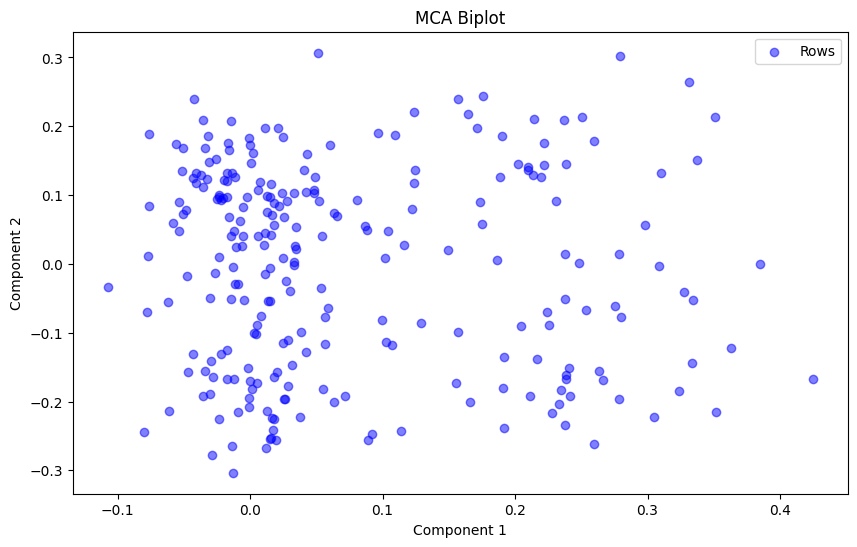

Varianza explicada por las dos primeras componentes: [0.17969925347807075, 0.059186066724192576, 0.04708539138628991, 0.042547040903466116, 0.03440947985728047]


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)

mca_fit = mca.fit(mcadata)

try:
    # Intenta acceder a la varianza explicada directamente
    explained_variance = mca.explained_inertia_
except AttributeError:
    # Si 'explained_inertia_' no está disponible, intenta métodos alternativos
    # Por ejemplo, usar eigenvalues_ para obtener una idea de la importancia de cada componente
    if hasattr(mca, 'eigenvalues_'):
        print("Eigenvalues:", mca.eigenvalues_)
    # O si necesitas calcular la varianza explicada manualmente
    if hasattr(mca, 'total_inertia_') and hasattr(mca, 'eigenvalues_'):
        explained_variance = [val / mca.total_inertia_ for val in mca.eigenvalues_]
        print("Calculated variance explained:", explained_variance)

# Asumiendo que mca_fit es tu objeto MCA ajustado
row_coordinates = mca_fit.row_coordinates(mcadata)
column_coordinates = mca_fit.column_coordinates(mcadata)

# Usando matplotlib para crear un biplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las coordenadas de las filas
ax.scatter(row_coordinates[0], row_coordinates[1], color='blue', alpha=0.5, label='Rows')

# Opcional: graficar las coordenadas de las columnas, ajusta los índices según tus datos
# ax.scatter(column_coordinates[0], column_coordinates[1], color='red', alpha=0.5, label='Columns')

ax.set_title('MCA Biplot')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()

plt.show()

# Imprimir la varianza explicada
print(f'Varianza explicada por las dos primeras componentes: {explained_variance}')

In [ ]:
main_components_data = mca_fit.eigenvalues_summary
main_components_data

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.067,17.97%,17.97%
1,0.022,5.92%,23.89%
2,0.017,4.71%,28.60%
3,0.016,4.25%,32.85%
4,0.013,3.44%,36.29%


In [ ]:
contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [ ]:
contrib_df.columns

RangeIndex(start=0, stop=5, step=1)

In [ ]:
mcadata.shape

(249, 219)

In [ ]:

contrib_df.to_csv('contributions_column_5comp_X_train.csv')

In [ ]:

mca_xtest = mca.transform(mcadata)
contributions_xtest = mca.column_contributions_.style.format('{:.0%}')
contrib_xtest = pd.DataFrame(contributions_xtest.data)


In [ ]:

# Seleccionamos variables de X_train con 85% de variabilidad acumulada

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

dataninos = mcadata[selected_variables]


In [ ]:
dataninos.shape

(249, 47)

In [ ]:
dataninos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 47 columns):
 #   Column                                                                                                                                                                      Non-Null Count  Dtype
---  ------                                                                                                                                                                      --------------  -----
 0   SDQ4                                                                                                                                                                        249 non-null    int64
 1    SUELE HACER LO QUE LE PIDEN LOS ADULTOS.                                                                                                                                   249 non-null    int64
 2    159. A MENUDO SE OFRECE PARA AYUDAR (A PADRES  MAESTROS  OTROS NIÑOS/AS).                    

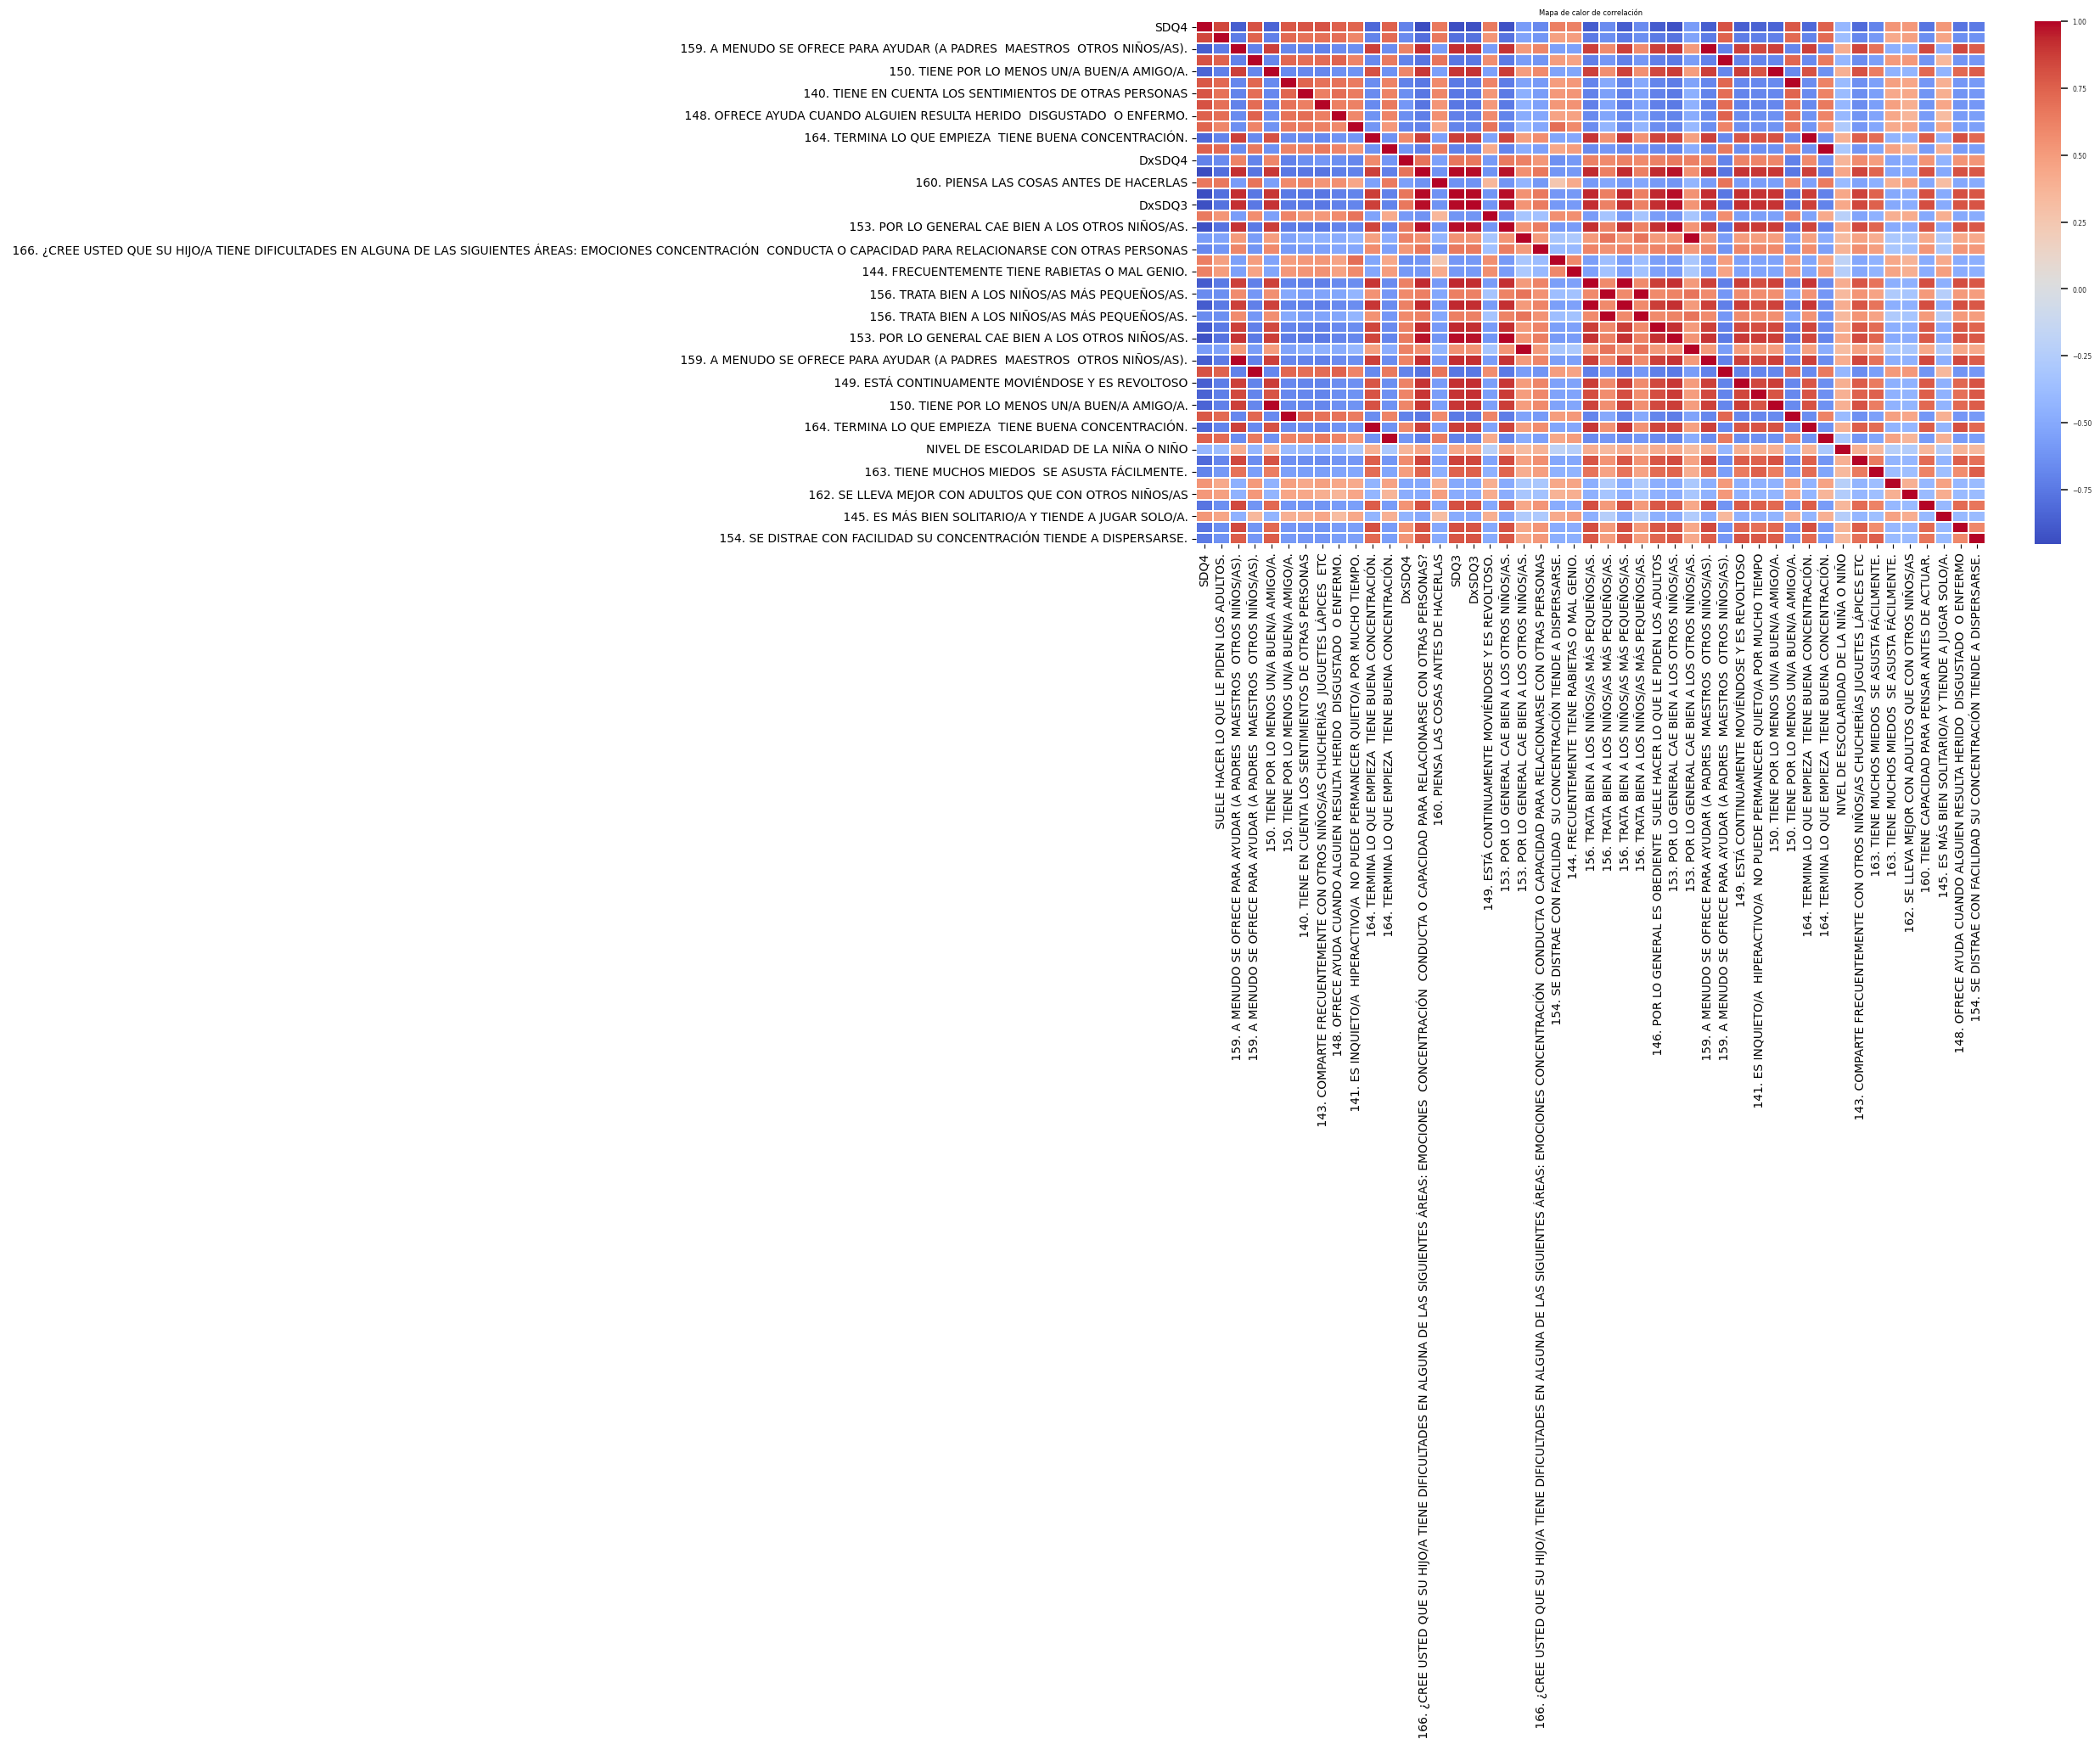

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = dataninos.corr(method='pearson')

# Creamos un mapa de calor de la matriz de correlación

fig, ax = plt.subplots(figsize=(15, 8))
sns.set(font_scale=0.5)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.05)
plt.title('Mapa de calor de correlación')
plt.show()

# Justificacion y Conclusiones
One-Hot Encoding en Variables Binarias:
1. Representación Numérica: Las variables categóricas, incluidas las binarias, generalmente necesitan ser transformadas en una forma numérica para que puedan ser procesadas por algoritmos de aprendizaje automático. One-Hot Encoding es una técnica común que convierte categorías en vectores binarios.

2. Claridad de Modelo: One-Hot Encoding transforma cada categoría en una nueva variable binaria (0 o 1) que es fácil de entender y modelar. Esto es especialmente útil para las variables binarias, donde cada estado (por ejemplo, Sí/No) se convierte en una clara presencia o ausencia representada por 1 o 0.

3. Evitar Sesgo de Orden: A diferencia de la codificación ordinal, One-Hot Encoding no implica un orden o jerarquía entre las categorías. Esto es vital para las variables binarias, ya que no queremos que el modelo asuma un peso o importancia inherente entre las dos opciones.

Análisis de Componentes Múltiples (MCA):
1. Reducción de Dimensionalidad: Cuando se trata de datos categóricos, especialmente con muchas variables o categorías, el MCA es una técnica de reducción de dimensionalidad adecuada. Permite resumir la información en menos dimensiones, conservando la mayor cantidad posible de la varianza original.

2. Visualización de Datos: MCA puede facilitar la visualización de la estructura de los datos en un espacio de menor dimensión. Esto puede revelar patrones, agrupaciones o relaciones entre categorías que no serían evidentes en el espacio de alta dimensión.

3. Preparación para Análisis Posteriores: Al reducir la dimensionalidad, el MCA puede hacer que los datos sean más manejables para análisis posteriores, como clustering o modelos predictivos, y puede mejorar el rendimiento de estos algoritmos.

4. Interpretación Mejorada: El MCA proporciona componentes que son combinaciones lineales de las variables originales. Cada componente puede interpretarse en términos de las variables que contribuyen más a ese componente, lo que puede ofrecer insights cualitativos sobre los datos.

Conclusión:
Tomando en cuenta la naturaleza de nuestrs bases de datos la combinación de One-Hot Encoding para las variables binarias y MCA para la reducción de dimensionalidad y la interpretación de datos categóricos puede ser mucha ayuda . One-Hot Encoding asegura que las variables binarias sean tratadas adecuadamente sin introducir sesgos de orden, mientras que el MCA sintetiza la información de todas las variables categóricas (incluidas las binarias codificadas) en componentes principales que capturan la esencia de los datos. Juntas, estas técnicas nos ayudaran a preparar un conjunto de datos complejo y de alta dimensión para un análisis más profundo y para la construcción de modelos más efectivos.

**Referencias:**
Galli, S. (2022, October). *Python Feature Engineering Cookbook - Second Edition*. Packt Publishing.

Khoong, W. (2023). *Dimensionality Reduction Techniques For Categorical & Continuous Data -
A Brief Walkthrough with Examples from Principal Components Analysis & Multiple Correspondence Analysis*.Medium. https://medium.com/codex/dimensionality-reduction-techniques-for-categorical-continuous-data-75d2bca53100#:~:text=Multiple%20correspondence%20analysis%20(MCA)%20is,more%20than%20two%20categorical%20variables.
